In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
cd d:\\Profiles\\sdhanapal\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\

d:\Profiles\sdhanapal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\data


In [6]:
#read the data
boston = load_boston()
#boston

In [8]:
#description of the data
splt_val=boston['DESCR'].split('\n')
splt_val[12:26]

['        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owner-occupied homes in $1000's"]

In [9]:
data=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [11]:
#checking the null values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
data['Price']=boston['target']

In [13]:
X=data.drop('Price',axis=1)

In [14]:
Y=data['Price']

In [16]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=100)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [40]:
#Using Linear regression fit and predict 
#r2 score used to find the accuracy of the model
LR=LinearRegression()
LR.fit(X_train,Y_train)
predictions=LR.predict(X_test)

In [41]:
rmse=np.sqrt(mean_squared_error(Y_test,predictions))
print(rmse)

4.859731895955129


In [42]:
r2_score(Y_test,predictions)

0.7555033086871304

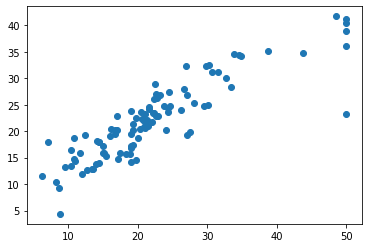

In [43]:
plt.scatter(Y_test,predictions)
plt.show()

In [48]:
#saving the model with use of pickle
filename='price_mode1.pickle'
pickle.dump(LR,open(filename,'wb'))

In [50]:
#test the saved model
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98]]))
print(prediction[0])

29.813068309838343
